In [5]:
#cargar librerias

import numpy as np
import matplotlib.pyplot as plt 
import os
from scipy.optimize import minimize
import glob 
import pandas as pd 
import re
import unicodecsv as cs
import csv

In [6]:
path= 'C:/Users/oscar/Downloads/HIGI_HernandezSerrano_ProyectoFinal/Proyecto_Final_Investigadores_activos_SNI/'
df_2012= pd.read_csv (path + '2012.csv')
print(df_2012)

      Nobilis Apellido paterno  Apellido materno         Nombre   Nivel  \
0          DR           MORENO           DE ALBA  JOSE GUADALUPE    3.0   
1          DR          PASCUAL              BUXO            JOSE    3.0   
2          DR            VERMA           JAISWAL    SURENDRA PAL    2.0   
3          DR           ALONSO           SANCHEZ           JORGE    3.0   
4          DR           AZAOLA           GARRIDO           ELENA    3.0   
...       ...              ...               ...             ...    ...   
18549      DR        DOMINGUEZ            OVIEDO         AGUSTIN    NaN   
18550      DR          HUITZIL          MELENDEZ     FIDEL DAVID    NaN   
18551    MTRO            KINDL  SIN INFORMACIÓN    OLIVIA SELENA    NaN   
18552      DR       PLASCENCIA             VILLA          GERMAN    NaN   
18553      DR            REYES             LOPEZ         ALFONSO    NaN   

                                             Institución  Área  
0      CENTRO DE INVESTIGACION Y E

In [7]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18554 entries, 0 to 18553
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nobilis           18554 non-null  object 
 1   Apellido paterno  18554 non-null  object 
 2   Apellido materno  18553 non-null  object 
 3   Nombre            18554 non-null  object 
 4   Nivel             14950 non-null  float64
 5   Institución       18554 non-null  object 
 6   Área              18554 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1014.8+ KB


In [161]:
df_2012.iloc[:, [0,4,5,6]]

Nobilis  Nivel                                        Institución  Área
0          DR    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...     4
1          DR    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...     4
2          DR    2.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO     2
3          DR    3.0                        INSTITUTO DE ECOLOGIA, A C      2
4          DR    3.0            UNIVERSIDAD AUTONOMA DE SAN LUIS POTOSI     1
...       ...    ...                                                ...   ...
18549      DR    NaN                    UNIVERSIDAD AUTONOMA DE NAYARIT     1
18550      DR    NaN                     INSTITUTO POLITECNICO NACIONAL     3
18551    MTRO    NaN             UNIVERSIDAD JUAREZ AUTONOMA DE TABASCO     6
18552      DR    NaN            CORROSION Y PROTECCION INGENIERIA, S C      7
18553      DR    NaN   INSTITUTO NACIONAL DE ENFERMEDADES RESPIRATORIAS     3

[18554 rows x 4 columns]

In [162]:
pd.crosstab(df_2012.Institución, df_2012.Nobilis)

Nobilis                           DR  LIC  MED  MTRO  SIN INFORMACIÓN
Institución                                                          
AALBORG UNIVERSITY                 1    0    0     0                0
ABBOTT GMBH & CO  KG               1    0    0     0                0
ADVANTICAL LTD                     1    0    0     0                0
AGRICULTURE AND AGRI FOOD CANADA   1    0    0     0                0
ANGLIA RUSKIN UNIVERSITY           1    0    0     0                0
...                               ..  ...  ...   ...              ...
WASEDA UNIVERSITY                  1    0    0     0                0
WASHINGTON STATE UNIVERSITY        1    0    0     0                0
WORLD HEALTH ORGANIZATION          1    0    0     0                0
YALE UNIVERSITY                    1    0    0     0                0
YESHIVA UNIVERSITY                 1    0    0     0                0

[591 rows x 5 columns]

In [41]:
pd.crosstab(df_2012.Institución, df_2012.Nivel)

Nivel                                               1.0  2.0  3.0  4.0
Institución                                                           
AALBORG UNIVERSITY                                    1    0    0    0
ABBOTT GMBH & CO  KG                                  1    0    0    0
ANTHONY NOLAN RESEARCH INSTITUTE                      0    0    1    0
ASOCIACION PARA EVITAR LA CEGUERA EN MEXICO, I ...    2    0    0    0
AUSTRALIAN NUCLEAR SCIENCE AND TECHNOLOGY ORGAN...    1    0    0    0
...                                                 ...  ...  ...  ...
VITRO TEC FIDEICOMISO                                 1    0    0    0
WAKE FOREST UNIVERSITY                                0    0    1    0
WASEDA UNIVERSITY                                     1    0    0    0
WORLD HEALTH ORGANIZATION                             1    0    0    0
YESHIVA UNIVERSITY                                    1    0    0    0

[440 rows x 4 columns]

In [188]:
pd.crosstab(df_2012.Área, df_2012.Nobilis)

Nobilis    DR  LIC  MED  MTRO  SIN INFORMACIÓN
Área                                          
1        2875   31   19    78                0
2        3023   27   17    95                0
3        1813   22    9    69                1
4        2643   31   19    80                0
5        2641   23   19    64                0
6        2104   15   11    47                0
7        2647   28   16    87                0

In [43]:
pd.crosstab(df_2012.Nivel,df_2012.Área)

Área      1     2     3     4     5     6     7
Nivel                                          
1.0    1339  1772  1180  1529  1524  1241  1473
2.0     689   493   285   598   522   326   398
3.0     403   270   162   243   233   126   109
4.0       9    15     3     5     1     1     1

In [44]:
pd.crosstab(df_2012.Institución,df_2012.Área)

Área                              1  2  3  4  5  6  7
Institución                                          
AALBORG UNIVERSITY                0  0  0  0  0  0  1
ABBOTT GMBH & CO  KG              0  0  1  0  0  0  0
ADVANTICAL LTD                    0  0  0  0  0  0  1
AGRICULTURE AND AGRI FOOD CANADA  0  0  0  0  0  1  0
ANGLIA RUSKIN UNIVERSITY          0  0  0  1  0  0  0
...                              .. .. .. .. .. .. ..
WASEDA UNIVERSITY                 0  0  0  0  0  0  1
WASHINGTON STATE UNIVERSITY       0  0  0  0  0  1  0
WORLD HEALTH ORGANIZATION         0  0  1  0  0  0  0
YALE UNIVERSITY                   0  1  0  0  0  0  0
YESHIVA UNIVERSITY                0  1  0  0  0  0  0

[591 rows x 7 columns]

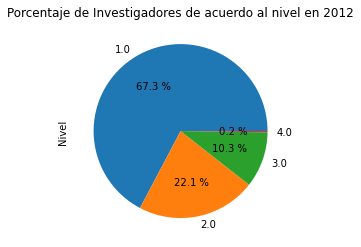

In [45]:
df_2012.Nivel.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al nivel en 2012')
plt.show()

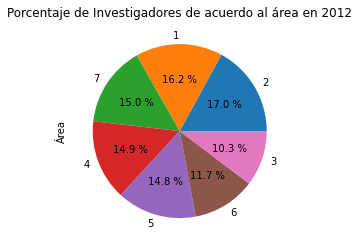

In [46]:
df_2012.Área.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al área en 2012')
plt.show()

In [47]:
path= 'C:/Users/oscar/Downloads/HIGI_HernandezSerrano_ProyectoFinal/Proyecto_Final_Investigadores_activos_SNI/'
df_2013= pd.read_csv (path + '2013.csv')
print(df_2013)

      Nobilis Apellido Paterno Apellido Materno           Nombre  Nivel  \
0         DR.           MORENO          DE ALBA   JOSE GUADALUPE    3.0   
1         DR.          PASCUAL             BUXO             JOSE    3.0   
2         DR.            VERMA          JAISWAL     SURENDRA PAL    3.0   
3         DR.           ALONSO          SANCHEZ            JORGE    3.0   
4        DRA.           AZAOLA          GARRIDO            ELENA    3.0   
...       ...              ...              ...              ...    ...   
19735     DR.           ALMADA           MONTER     SERGIO ANGEL    NaN   
19736    DRA.          MENDOZA         GONZALEZ  ANGELA CATALINA    1.0   
19737    DRA.          BARBOSA            MUÑOZ    PERLA ARACELI    NaN   
19738     DR.           CHAVES           BEDOYA         GIOVANNI    NaN   
19739     DR.            GOMEZ        HERNANDEZ          NICOLAS    NaN   

                                             Institución  Área  
0                UNIVERSIDAD NACIO

In [48]:
df_2013.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nobilis           19740 non-null  object 
 1   Apellido Paterno  19740 non-null  object 
 2   Apellido Materno  19739 non-null  object 
 3   Nombre            19740 non-null  object 
 4   Nivel             16028 non-null  float64
 5   Institución       19740 non-null  object 
 6   Área              19740 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [49]:
df_2013.iloc[:, [0,4,5,6]]

Nobilis  Nivel                                        Institución  Área
0         DR.    3.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO     4
1         DR.    3.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO     4
2         DR.    3.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO     1
3         DR.    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...     4
4        DRA.    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...     4
...       ...    ...                                                ...   ...
19735     DR.    NaN                  UNIVERSIDAD DE CAROLINA DEL NORTE     1
19736    DRA.    1.0                     INSTITUTO POLITECNICO NACIONAL     2
19737    DRA.    NaN   UNIVERSIDAD MICHOACANA DE SAN NICOLAS DE HIDALGO     5
19738     DR.    NaN                          UNIVERSIDAD DE LOS LLANOS     2
19739     DR.    NaN                   UNIVERSIDAD DE MISSOURI COLUMBIA     2

[19740 rows x 4 columns]

In [50]:
pd.crosstab(df_2013.Institución, df_2013.Nobilis)

Nobilis                               BIOL.  DR.  DRA.  ING.  LIC.  M. EN C.  \
Institución                                                                    
AGRONEGOCIOS AGRADIS DE MEXICO, S.C.      0    0     1     0     0         0   
ALGALIMENTOS, S.A. DE C.V.                0    1     0     0     0         0   
ALGOMA UNIVERSITY                         0    1     0     0     0         0   
AMBIENTAL C&C S.C.                        0    1     0     0     0         0   
ANGLIA RUSKIN UNIVERSITY                  0    0     1     0     0         0   
...                                     ...  ...   ...   ...   ...       ...   
WAKE FOREST UNIVERSITY                    0    1     0     0     0         0   
WASEDA UNIVERSITY                         0    1     0     0     0         0   
WEST VIRGINIA UNIVERSITY                  0    1     0     0     0         0   
WILLIAM BEAUMONT HOSPITAL                 0    1     0     0     0         0   
YESHIVA UNIVERSITY                        0    1     0     0     0         0   

Nobilis                               MED.  MTRA.  MTRO.  QUIM.  \
Institución                                                       
AGRONEGOCIOS AGRADIS DE MEXICO, S.C.     0      0      0      0   
ALGALIMENTOS, S.A. DE C.V.               0      0      0      0   
ALGOMA UNIVERSITY                        0      0      0      0   
AMBIENTAL C&C S.C.                       0      0      0      0   
ANGLIA RUSKIN UNIVERSITY                 0      0      0      0   
...                                    ...    ...    ...    ...   
WAKE FOREST UNIVERSITY                   0      0      0      0   
WASEDA UNIVERSITY                        0      0      0      0   
WEST VIRGINIA UNIVERSITY                 0      0      0      0   
WILLIAM BEAUMONT HOSPITAL                0      0      0      0   
YESHIVA UNIVERSITY                       0      0      0      0   

Nobilis                               SIN INFORMACIÓN  
Institución                                            
AGRONEGOCIOS AGRADIS DE MEXICO, S.C.                0  
ALGALIMENTOS, S.A. DE C.V.                          0  
ALGOMA UNIVERSITY                                   0  
AMBIENTAL C&C S.C.                                  0  
ANGLIA RUSKIN UNIVERSITY                            0  
...                                               ...  
WAKE FOREST UNIVERSITY                              0  
WASEDA UNIVERSITY                                   0  
WEST VIRGINIA UNIVERSITY                            0  
WILLIAM BEAUMONT HOSPITAL                           0  
YESHIVA UNIVERSITY                                  0  

[620 rows x 11 columns]

In [51]:
pd.crosstab(df_2013.Institución, df_2013.Nivel)

Nivel                                               1.0  2.0  3.0
Institución                                                      
AGRONEGOCIOS AGRADIS DE MEXICO, S.C.                  1    0    0
ALGOMA UNIVERSITY                                     1    0    0
ANTHONY NOLAN RESEARCH INSTITUTE                      0    0    1
ASOCIACION MEXICANA PARA LA INNOVACION EN TECNO...    1    0    0
ASOCIACION NACIONAL DE ESPECIALISTAS EN IRRIGAC...    1    0    0
...                                                 ...  ...  ...
WAKE FOREST UNIVERSITY                                0    0    1
WASEDA UNIVERSITY                                     1    0    0
WEST VIRGINIA UNIVERSITY                              1    0    0
WILLIAM BEAUMONT HOSPITAL                             0    1    0
YESHIVA UNIVERSITY                                    1    0    0

[462 rows x 3 columns]

In [52]:
pd.crosstab(df_2013.Área, df_2013.Nobilis)

Nobilis  BIOL.   DR.  DRA.  ING.  LIC.  M. EN C.  MED.  MTRA.  MTRO.  QUIM.  \
Área                                                                          
1            0  2513   597     6    26         2     0     11     45      0   
2            2  1847  1272     3    46         1     6     97     84      1   
3            1   766   736     0    85         1   161    123    159      2   
4            0  1442  1387     1    18         0     2     30     36      0   
5            0  1824  1041     0    37         0     0     38     55      0   
6            0  1582   703     2     9         1     1      5     24      0   
7            0  2279   587     8     4         0     0      2     27      0   

Nobilis  SIN INFORMACIÓN  
Área                      
1                      1  
2                      1  
3                      0  
4                      0  
5                      0  
6                      0  
7                      0

In [187]:
pd.crosstab(df_2013.Nivel,df_2013.Área)

Área      1     2     3     4     5     6     7
Nivel                                          
1.0    1389  1867  1246  1638  1693  1322  1599
2.0     742   558   340   614   527   342   452
3.0     448   297   179   254   264   134   123

In [54]:
pd.crosstab(df_2013.Institución,df_2013.Área)

Área                                  1  2  3  4  5  6  7
Institución                                              
AGRONEGOCIOS AGRADIS DE MEXICO, S.C.  0  0  0  0  0  1  0
ALGALIMENTOS, S.A. DE C.V.            0  0  0  0  0  1  0
ALGOMA UNIVERSITY                     0  0  0  0  0  0  1
AMBIENTAL C&C S.C.                    0  0  0  0  0  1  0
ANGLIA RUSKIN UNIVERSITY              0  0  0  1  0  0  0
...                                  .. .. .. .. .. .. ..
WAKE FOREST UNIVERSITY                0  1  0  0  0  0  0
WASEDA UNIVERSITY                     0  0  0  0  0  0  1
WEST VIRGINIA UNIVERSITY              0  0  0  0  0  0  1
WILLIAM BEAUMONT HOSPITAL             0  0  1  0  0  0  0
YESHIVA UNIVERSITY                    0  1  0  0  0  0  0

[620 rows x 7 columns]

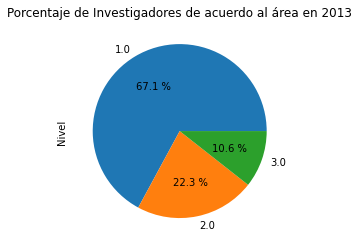

In [55]:
df_2013.Nivel.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al área en 2013')
plt.show()

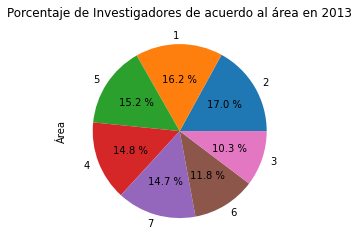

In [56]:
df_2013.Área.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al área en 2013')
plt.show()

In [57]:
path= 'C:/Users/oscar/Downloads/HIGI_HernandezSerrano_ProyectoFinal/Proyecto_Final_Investigadores_activos_SNI/'
df_2014= pd.read_csv (path + '2014.csv')
print(df_2014)

      Nobilis Apellido Paterno Apellido Materno          Nombre  Nivel Genero  \
0         DR.           MORENO          DE ALBA  JOSE GUADALUPE    3.0      M   
1         DR.          PASCUAL             BUXO            JOSE    3.0      M   
2         DR.            VERMA          JAISWAL    SURENDRA PAL    3.0      M   
3         DR.           ALONSO          SANCHEZ           JORGE    3.0      M   
4        DRA.           AZAOLA          GARRIDO           ELENA    3.0      F   
...       ...              ...              ...             ...    ...    ...   
23297     DR.           TREJOS          MONTOYA   VÍCTOR MANUEL    NaN      M   
23298    DRA.          RAMIREZ         JASPEADO         ARACELI    NaN      F   
23299     DR.          SANCHEZ           OCAMPO   PAUL MAURICIO    NaN      M   
23300    DRA.           CORREA         MURRIETA     MA. ARACELI    NaN      F   
23301     DR.          SHULIKA              NaN         OLEKSIY    2.0      M   

                           

In [58]:
df_2014[['Nivel']]=df_2014[['Nivel']].astype('float64')
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23302 entries, 0 to 23301
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nobilis           23302 non-null  object 
 1   Apellido Paterno  23302 non-null  object 
 2   Apellido Materno  22510 non-null  object 
 3   Nombre            23301 non-null  object 
 4   Nivel             18727 non-null  float64
 5   Genero            23302 non-null  object 
 6   Institución       23288 non-null  object 
 7   Estado            23302 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.4+ MB


In [59]:
df_2014.iloc[:, [0,4,6]]

Nobilis  Nivel                                        Institución
0         DR.    3.0                                    NO ESPECIFICADO
1         DR.    3.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO
2         DR.    3.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO
3         DR.    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...
4        DRA.    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...
...       ...    ...                                                ...
23297     DR.    NaN                                    SIN INSTITUCION
23298    DRA.    NaN     COLEGIO DE POSTGRADUADOS EN CIENCIAS AGRICOLAS
23299     DR.    NaN                         UNIVERSIDAD DEL PAPALOAPAN
23300    DRA.    NaN                    INSTITUTO TECNOLOGICO DE SONORA
23301     DR.    2.0                          UNIVERSIDAD DE GUANAJUATO

[23302 rows x 3 columns]

In [60]:
pd.crosstab(df_2014.Institución,df_2014.Nobilis)

Nobilis                                         BIOL.  DR.  DRA.  FIS.  ING.  \
Institución                                                                    
AALTO UNIVERSITY                                    0    1     0     0     0   
ABASTECEDORA ELECTRICA TEHUACAN SA DE CV            0    1     0     0     0   
ACADEMIA DE CIENCIAS DE HUNGRIA                     0    1     0     0     0   
ACADEMIA DE CIENCIAS Y ARTES DE ESLOVENIA           0    0     1     0     0   
ACADEMIA MEXICANA DE DERECHOS HUMANOS               0    1     0     0     0   
...                                               ...  ...   ...   ...   ...   
WASEDA UNIVERSITY                                   0    1     0     0     0   
WORCESTER POLYTECHNIC INSTITUTE                     0    1     1     0     0   
YESHIVA UNIVERSITY                                  0    1     0     0     0   
ZENTRUM FUR EUROPAISCHE WIRTSCHAFTSFORS             0    1     0     0     0   
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENIG      0    1     0     0     0   

Nobilis                                         LIC.  M. EN A.  M. EN B.  \
Institución                                                                
AALTO UNIVERSITY                                   0         0         0   
ABASTECEDORA ELECTRICA TEHUACAN SA DE CV           0         0         0   
ACADEMIA DE CIENCIAS DE HUNGRIA                    0         0         0   
ACADEMIA DE CIENCIAS Y ARTES DE ESLOVENIA          0         0         0   
ACADEMIA MEXICANA DE DERECHOS HUMANOS              0         0         0   
...                                              ...       ...       ...   
WASEDA UNIVERSITY                                  0         0         0   
WORCESTER POLYTECHNIC INSTITUTE                    0         0         0   
YESHIVA UNIVERSITY                                 0         0         0   
ZENTRUM FUR EUROPAISCHE WIRTSCHAFTSFORS            0         0         0   
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENIG     0         0         0   

Nobilis                                         M. EN C.  M. EN I.  MED.  \
Institución                                                                
AALTO UNIVERSITY                                       0         0     0   
ABASTECEDORA ELECTRICA TEHUACAN SA DE CV               0         0     0   
ACADEMIA DE CIENCIAS DE HUNGRIA                        0         0     0   
ACADEMIA DE CIENCIAS Y ARTES DE ESLOVENIA              0         0     0   
ACADEMIA MEXICANA DE DERECHOS HUMANOS                  0         0     0   
...                                                  ...       ...   ...   
WASEDA UNIVERSITY                                      0         0     0   
WORCESTER POLYTECHNIC INSTITUTE                        0         0     0   
YESHIVA UNIVERSITY                                     0         0     0   
ZENTRUM FUR EUROPAISCHE WIRTSCHAFTSFORS                0         0     0   
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENIG         0         0     0   

Nobilis                                         MTRA.  MTRO.  Q.F.B.  QUIM.  
Institución                                                                  
AALTO UNIVERSITY                                    0      0       0      0  
ABASTECEDORA ELECTRICA TEHUACAN SA DE CV            0      0       0      0  
ACADEMIA DE CIENCIAS DE HUNGRIA                     0      0       0      0  
ACADEMIA DE CIENCIAS Y ARTES DE ESLOVENIA           0      0       0      0  
ACADEMIA MEXICANA DE DERECHOS HUMANOS               0      0       0      0  
...                                               ...    ...     ...    ...  
WASEDA UNIVERSITY                                   0      0       0      0  
WORCESTER POLYTECHNIC INSTITUTE                     0      0       0      0  
YESHIVA UNIVERSITY                                  0      0       0      0  
ZENTRUM FUR EUROPAISCHE WIRTSCHAFTSFORS             0      0       0      0  
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENI

In [61]:
pd.crosstab(df_2014.Institución,df_2014.Nivel)

Nivel                                               1.0  2.0  3.0
Institución                                                      
ABASTECEDORA ELECTRICA TEHUACAN SA DE CV              1    0    0
ACADEMIA DE CIENCIAS Y ARTES DE ESLOVENIA             1    0    0
ACADEMIA MEXICANA DE DERECHOS HUMANOS                 0    0    1
ADENTECH SA DE CV                                     1    0    0
AGRACAST DE MEXICO SA DE CV                           1    0    0
...                                                 ...  ...  ...
VLAAMS INTERUNIVERSITAIR INSTITUUT VOOR BIOTECH...    1    0    0
WASEDA UNIVERSITY                                     1    0    0
WORCESTER POLYTECHNIC INSTITUTE                       2    0    0
YESHIVA UNIVERSITY                                    0    1    0
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENIG        1    0    0

[670 rows x 3 columns]

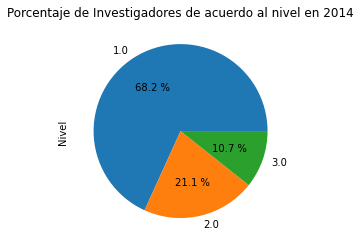

In [144]:
df_2014.Nivel.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al nivel en 2014')
plt.show()

In [100]:
path= 'C:/Users/oscar/Downloads/HIGI_HernandezSerrano_ProyectoFinal/Proyecto_Final_Investigadores_activos_SNI/'
df_2015= pd.read_csv (path + '2015.csv')
print(df_2015)

      Nobilis Apellido Paterno  Apellido Materno         Nombre  Nivel  \
0         DR.             VERMA          JAISWAL   SURENDRA PAL    3.0   
1         DR.            ALONSO          SANCHEZ          JORGE    3.0   
2        DRA.            AZAOLA          GARRIDO          ELENA    3.0   
3         DR.             RAMON           ROMERO  FIDEL ALBERTO    2.0   
4         DR.             PEREZ            ANGON   MIGUEL ANGEL    3.0   
...       ...               ...              ...            ...    ...   
23311     DR.            TREJOS          MONTOYA  VÍCTOR MANUEL    NaN   
23312    DRA.           RAMIREZ         JASPEADO        ARACELI    NaN   
23313     DR.           SANCHEZ           OCAMPO  PAUL MAURICIO    NaN   
23314    DRA.            CORREA         MURRIETA    MA. ARACELI    NaN   
23315     DR.           SHULIKA              NaN        OLEKSIY    2.0   

                                             Institución              Área  
0                UNIVERSIDAD NACIO

In [101]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23316 entries, 0 to 23315
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nobilis            23316 non-null  object 
 1   Apellido Paterno   23316 non-null  object 
 2   Apellido Materno   22557 non-null  object 
 3   Nombre             23316 non-null  object 
 4   Nivel              18741 non-null  float64
 5   Institución        23316 non-null  object 
 6   Área               23316 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.2+ MB


In [102]:
df_2015.iloc[:, [0,4,5,6]]

Nobilis  Nivel                                        Institución  \
0         DR.    3.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO   
1         DR.    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...   
2        DRA.    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...   
3         DR.    2.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO   
4         DR.    3.0  CENTRO DE INVESTIGACION Y DE ESTUDIOS AVANZADO...   
...       ...    ...                                                ...   
23311     DR.    NaN                                   Sin información    
23312    DRA.    NaN     COLEGIO DE POSTGRADUADOS EN CIENCIAS AGRICOLAS   
23313     DR.    NaN                         UNIVERSIDAD DEL PAPALOAPAN   
23314    DRA.    NaN                    INSTITUTO TECNOLOGICO DE SONORA   
23315     DR.    2.0                          UNIVERSIDAD DE GUANAJUATO   

                   Área  
0                     1  
1                     4  
2                     4  
3                     2  
4                     1  
...                 ...  
23311  Sin información   
23312  Sin información   
23313  Sin información   
23314  Sin información   
23315  Sin información   

[23316 rows x 4 columns]

In [103]:
pd.crosstab(df_2015.Institución,df_2015.Nobilis)

Nobilis                                         BIOL.  DR.  DR..  DRA.  FIS.  \
Institución                                                                    
AALTO UNIVERSITY                                    0    1     0     0     0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.      0    1     0     0     0   
ADENTECH, S.A. DE C.V.                              0    1     0     0     0   
AGRIBEST, S.A. DE C.V.                              0    0     0     1     0   
AGRICULTURE AND AGRI-FOOD CANADA                    0    1     0     0     0   
...                                               ...  ...   ...   ...   ...   
YALE UNIVERSITY                                     0    1     0     2     0   
YESHIVA UNIVERSITY                                  0    1     0     0     0   
YORK UNIVERSITY                                     0    2     0     0     0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG         0    1     0     0     0   
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENIG      0    1     0     0     0   

Nobilis                                         ING.  LIC.  M. EN A.  \
Institución                                                            
AALTO UNIVERSITY                                   0     0         0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.     0     0         0   
ADENTECH, S.A. DE C.V.                             0     0         0   
AGRIBEST, S.A. DE C.V.                             0     0         0   
AGRICULTURE AND AGRI-FOOD CANADA                   0     0         0   
...                                              ...   ...       ...   
YALE UNIVERSITY                                    0     0         0   
YESHIVA UNIVERSITY                                 0     0         0   
YORK UNIVERSITY                                    0     0         0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG        0     0         0   
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENIG     0     0         0   

Nobilis                                         M. EN B.  M. EN C.  M. EN I.  \
Institución                                                                    
AALTO UNIVERSITY                                       0         0         0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.         0         0         0   
ADENTECH, S.A. DE C.V.                                 0         0         0   
AGRIBEST, S.A. DE C.V.                                 0         0         0   
AGRICULTURE AND AGRI-FOOD CANADA                       0         0         0   
...                                                  ...       ...       ...   
YALE UNIVERSITY                                        0         1         0   
YESHIVA UNIVERSITY                                     0         0         0   
YORK UNIVERSITY                                        0         1         0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG            0         0         0   
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENIG         0         0         0   

Nobilis                                         MED.  MTRA.  MTRO.  Q.B.P.  \
Institución                                                                  
AALTO UNIVERSITY                                   0      0      0       0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.     0      0      0       0   
ADENTECH, S.A. DE C.V.                             0      0      0       0   
AGRIBEST, S.A. DE C.V.                             0      0      0       0   
AGRICULTURE AND AGRI-FOOD CANADA                   0      0      0       0   
...                                              ...    ...    ...     ...   
YALE UNIVERSITY                                    0      0      0       0   
YESHIVA UNIVERSITY                                 0      0      0       0   
YORK UNIVERSITY                                    0      0      0       0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG        0      0      0       0   
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENI

In [104]:
pd.crosstab(df_2015.Institución,df_2015.Nivel)

Nivel                                           1.0  2.0  3.0  4.0
Institución                                                       
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.    1    0    0    0
ADENTECH, S.A. DE C.V.                            1    0    0    0
AGRICULTURE AND AGRI-FOOD CANADA                  1    0    0    0
AGRONEGOCIOS AGRADIS DE MEXICO, S.C.              1    0    0    0
ALGOMA UNIVERSITY                                 1    0    0    0
...                                             ...  ...  ...  ...
WORCESTER POLYTECHNIC INSTITUTE                   2    0    0    0
YALE UNIVERSITY                                   2    0    0    0
YESHIVA UNIVERSITY                                0    1    0    0
YORK UNIVERSITY                                   2    0    0    0
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENIG    1    0    0    0

[604 rows x 4 columns]

In [105]:
pd.crosstab(df_2015.Área,df_2015.Nobilis)

Nobilis           BIOL.   DR.  DR..  DRA.  FIS.  ING.  LIC.  M. EN A.  \
Área                                                                    
1                     0  1713     0   358     2     1     0         0   
2                     7  1204     0   704     0     1     2         0   
3                     5   512     1   494     0     0     1         0   
4                     0   947     0   900     0     1     4         0   
5                     0  1108     0   589     0     0     4         0   
6                     0  1069     0   404     0     0     0         1   
7                     0  1369     0   288     0     0     0         0   
Sin información      24  6510     0  4231     1     3    14         0   

Nobilis           M. EN B.  M. EN C.  M. EN I.  MED.  MTRA.  MTRO.  Q.B.P.  \
Área                                                                         
1                        0        18         1     0      0      0       0   
2                        1        48         0     3      0      1       0   
3                        0       114         0   139      6      6       1   
4                        0         0         1     1      6      9       0   
5                        0         0         0     0      4     10       0   
6                        0        11         0     0      0      0       0   
7                        0         6         4     0      0      0       0   
Sin información          0       292         2   101     12     19       0   

Nobilis           Q.F.B.  QUIM.  
Área                             
1                      0      1  
2                      0      4  
3                      2     13  
4                      0      0  
5                      0      0  
6                      0      0  
7                      0      0  
Sin información        0      8

In [106]:
pd.crosstab(df_2015.Nivel,df_2015.Área)

Área     1     2    3     4    5    6    7  Sin información 
Nivel                                                       
1.0    822  1039  743  1033  922  949  996              6271
2.0    753   607  347   577  500  373  517               290
3.0    510   327  203   255  292  157  150               107
4.0      1     0    0     0    0    0    0                 0

In [109]:
pd.crosstab(df_2015.Institución,df_2015.Área)

Área                                            1  2  3  4  5  6  7  \
Institución                                                           
AALTO UNIVERSITY                                0  0  0  0  0  0  0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.  0  0  0  0  0  0  0   
ADENTECH, S.A. DE C.V.                          0  0  0  0  0  0  0   
AGRIBEST, S.A. DE C.V.                          0  0  0  0  0  0  0   
AGRICULTURE AND AGRI-FOOD CANADA                0  0  0  0  0  0  0   
...                                            .. .. .. .. .. .. ..   
YALE UNIVERSITY                                 0  0  0  0  0  0  0   
YESHIVA UNIVERSITY                              0  0  0  0  0  0  0   
YORK UNIVERSITY                                 0  0  0  0  0  0  0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG     0  0  0  0  0  0  0   
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENIG  0  0  0  0  0  0  0   

Área                                            Sin información   
Institución                                                       
AALTO UNIVERSITY                                               1  
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.                 1  
ADENTECH, S.A. DE C.V.                                         1  
AGRIBEST, S.A. DE C.V.                                         1  
AGRICULTURE AND AGRI-FOOD CANADA                               1  
...                                                          ...  
YALE UNIVERSITY                                                4  
YESHIVA UNIVERSITY                                             1  
YORK UNIVERSITY                                                3  
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG                    1  
ZOOLOGISCHES FORSCHUNGSMUSEUM ALEXANDER KOENIG                 1  

[786 rows x 8 columns]

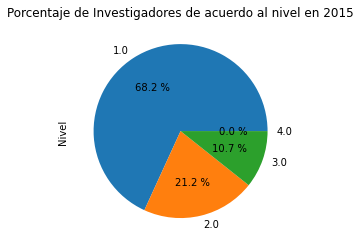

In [143]:
df_2015.Nivel.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al nivel en 2015')
plt.show()

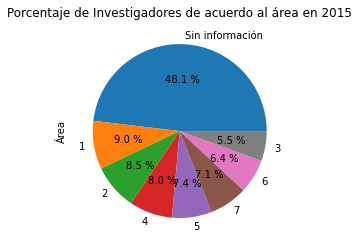

In [145]:
df_2015.Área.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al área en 2015')
plt.show()

In [110]:
path= 'C:/Users/oscar/Downloads/HIGI_HernandezSerrano_ProyectoFinal/Proyecto_Final_Investigadores_activos_SNI/'
df_2016= pd.read_csv (path + '2016.csv')
print(df_2016)

      Nobilis Apellido Paterno  Apellido Materno          Nombre  Nivel  \
0         DR.            MORENO          DE ALBA  JOSE GUADALUPE    3.0   
1         DR.           PASCUAL             BUXO            JOSE    3.0   
2         DR.             VERMA          JAISWAL    SURENDRA PAL    3.0   
3         DR.            ALONSO          SANCHEZ           JORGE    3.0   
4        DRA.            AZAOLA          GARRIDO           ELENA    3.0   
...       ...               ...              ...             ...    ...   
25068    DRA.           SANCHEZ         SANDOVAL  SILVIA ROSALIA    1.0   
25069    DRA.           RAMIREZ          VAZQUEZ          MONICA    NaN   
25070    DRA.          MURRIETA             LOYO        GRISELDA    1.0   
25071     DR.             ROSAS          CAMACHO            OMAR    1.0   
25072    MED.          VALENCIA          HERRERA   ADRIANA MARIA    1.0   

                                             Institución  Área  
0                                 

In [111]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25073 entries, 0 to 25072
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nobilis            25073 non-null  object 
 1   Apellido Paterno   25073 non-null  object 
 2   Apellido Materno   24193 non-null  object 
 3   Nombre             25073 non-null  object 
 4   Nivel              20029 non-null  float64
 5   Institución        25073 non-null  object 
 6   Área               25073 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


In [112]:
df_2016.iloc[:, [0,4,5,6]]

Nobilis  Nivel                                        Institución  Área
0         DR.    3.0                                   Sin información      4
1         DR.    3.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO     4
2         DR.    3.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO     1
3         DR.    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...     4
4        DRA.    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...     4
...       ...    ...                                                ...   ...
25068    DRA.    1.0                    INSTITUTO NACIONAL DE PEDIATRIA     3
25069    DRA.    NaN            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO     2
25070    DRA.    1.0                        UNIVERSIDAD DE QUINTANA ROO     4
25071     DR.    1.0                                UNIVERSITY OF AKRON     7
25072    MED.    1.0     HOSPITAL INFANTIL DE MEXICO DR. FEDERICO GOMEZ     3

[25073 rows x 4 columns]

In [113]:
pd.crosstab(df_2016.Institución,df_2016.Nobilis)

Nobilis                                         BIOL.  DR.  DRA.  FIS.  ING.  \
Institución                                                                    
AALTO UNIVERSITY                                    0    2     0     0     0   
AARHUS UNIVERSITET                                  0    1     0     0     0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.      0    1     0     0     0   
ACADEMIA MEXICANA DE DERECHOS HUMANOS               0    1     0     0     0   
ADENTECH, S.A. DE C.V.                              0    1     0     0     0   
...                                               ...  ...   ...   ...   ...   
WORCESTER POLYTECHNIC INSTITUTE                     0    1     1     0     0   
YALE UNIVERSITY                                     0    1     1     0     0   
YESHIVA UNIVERSITY                                  0    1     0     0     0   
YORK UNIVERSITY                                     0    1     0     0     0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG         0    1     0     0     0   

Nobilis                                         LIC.  M. EN A.  M. EN B.  \
Institución                                                                
AALTO UNIVERSITY                                   0         0         0   
AARHUS UNIVERSITET                                 0         0         0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.     0         0         0   
ACADEMIA MEXICANA DE DERECHOS HUMANOS              0         0         0   
ADENTECH, S.A. DE C.V.                             0         0         0   
...                                              ...       ...       ...   
WORCESTER POLYTECHNIC INSTITUTE                    0         0         0   
YALE UNIVERSITY                                    0         0         0   
YESHIVA UNIVERSITY                                 0         0         0   
YORK UNIVERSITY                                    0         0         0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG        0         0         0   

Nobilis                                         M. EN C.  M. EN I.  MED.  \
Institución                                                                
AALTO UNIVERSITY                                       0         0     0   
AARHUS UNIVERSITET                                     0         0     0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.         0         0     0   
ACADEMIA MEXICANA DE DERECHOS HUMANOS                  0         0     0   
ADENTECH, S.A. DE C.V.                                 0         0     0   
...                                                  ...       ...   ...   
WORCESTER POLYTECHNIC INSTITUTE                        0         0     0   
YALE UNIVERSITY                                        1         0     0   
YESHIVA UNIVERSITY                                     0         0     0   
YORK UNIVERSITY                                        1         0     0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG            0         0     0   

Nobilis                                         MTRA.  MTRO.  Q.F.B.  QUIM.  
Institución                                                                  
AALTO UNIVERSITY                                    0      0       0      0  
AARHUS UNIVERSITET                                  0      0       0      0  
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.      0      0       0      0  
ACADEMIA MEXICANA DE DERECHOS HUMANOS               0      0       0      0  
ADENTECH, S.A. DE C.V.                              0      0       0      0  
...                                               ...    ...     ...    ...  
WORCESTER POLYTECHNIC INSTITUTE                     0      0       0      0  
YALE UNIVERSITY                                     0      0       0      0  
YESHIVA UNIVERSITY                                  0      0       0      0  
YORK UNIVERSITY                                     0      0       0      0  
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG  

In [114]:
pd.crosstab(df_2016.Institución,df_2016.Nivel)

Nivel                                           1.0  2.0  3.0  4.0
Institución                                                       
AARHUS UNIVERSITET                                1    0    0    0
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.    1    0    0    0
ACADEMIA MEXICANA DE DERECHOS HUMANOS             0    0    1    0
ADENTECH, S.A. DE C.V.                            1    0    0    0
AGRACAST DE MEXICO, S.A. DE C.V.                  1    0    0    0
...                                             ...  ...  ...  ...
WEIZMANN INSTITUTE OF SCIENCES                    1    0    0    0
WORCESTER POLYTECHNIC INSTITUTE                   2    0    0    0
YALE UNIVERSITY                                   1    0    0    0
YESHIVA UNIVERSITY                                0    1    0    0
YORK UNIVERSITY                                   1    0    0    0

[664 rows x 4 columns]

In [115]:
pd.crosstab(df_2016.Área,df_2016.Nobilis)

Nobilis  BIOL.   DR.  DRA.  FIS.  ING.  LIC.  M. EN A.  M. EN B.  M. EN C.  \
Área                                                                         
1            1  3103   830     3     2     1         0         0        53   
2           16  2275  1632     0     2     7         0         1       127   
3           12  1080  1122     0     0     2         0         0       327   
4            0  1860  1854     0     1     4         0         0         0   
5            0  2443  1519     0     0     6         0         0         1   
6            0  1850   977     0     0     0         1         0        12   
7            0  2816   760     0     1     0         0         0         7   

Nobilis  M. EN I.  MED.  MTRA.  MTRO.  Q.F.B.  QUIM.  
Área                                                  
1               1     0      0      1       0      1  
2               0     5      1      2       0     12  
3               1   255     11     19       2     13  
4               1     0      6      9       0      0  
5               0     0      6     15       0      0  
6               0     0      0      0       0      0  
7               4     0      0      0       0      0

In [116]:
pd.crosstab(df_2016.Nivel,df_2016.Área)

Área      1     2     3     4     5     6     7
Nivel                                          
1.0    1793  2140  1704  2189  2175  1553  2156
2.0     837   676   464   625   652   426   541
3.0     549   364   235   281   336   177   155
4.0       1     0     0     0     0     0     0

In [117]:
pd.crosstab(df_2016.Institución,df_2016.Área)

Área                                            1  2  3  4  5  6  7
Institución                                                        
AALTO UNIVERSITY                                1  0  0  0  1  0  0
AARHUS UNIVERSITET                              0  0  1  0  0  0  0
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.  0  0  0  0  0  0  1
ACADEMIA MEXICANA DE DERECHOS HUMANOS           0  0  0  0  0  1  0
ADENTECH, S.A. DE C.V.                          0  0  0  0  0  1  0
...                                            .. .. .. .. .. .. ..
WORCESTER POLYTECHNIC INSTITUTE                 0  0  1  0  0  0  1
YALE UNIVERSITY                                 0  1  1  0  0  0  1
YESHIVA UNIVERSITY                              0  1  0  0  0  0  0
YORK UNIVERSITY                                 2  0  0  0  0  0  0
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG     0  0  0  0  1  0  0

[839 rows x 7 columns]

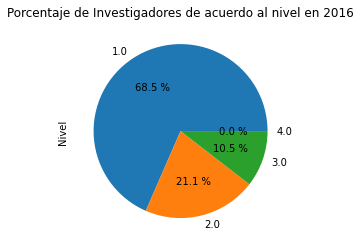

In [146]:
df_2016.Nivel.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al nivel en 2016')
plt.show()

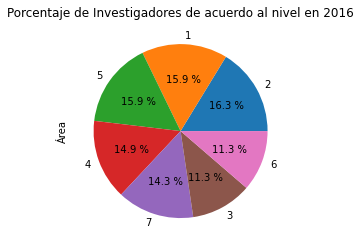

In [149]:
df_2016.Área.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al nivel en 2016')
plt.show()

In [165]:
path= 'C:/Users/oscar/Downloads/HIGI_HernandezSerrano_ProyectoFinal/Proyecto_Final_Investigadores_activos_SNI/'
df_2017= pd.read_csv (path + '2017.csv')
print(df_2017)

      Nobilis Apellido paterno    Apellido Materno                  Nombre  \
0         DR.             VERMA            JAISWAL            SURENDRA PAL   
1         DR.            ALONSO            SANCHEZ                   JORGE   
2        DRA.            AZAOLA            GARRIDO                   ELENA   
3         DR.             RAMON             ROMERO           FIDEL ALBERTO   
4         DR.             PEREZ              ANGON            MIGUEL ANGEL   
...       ...               ...                ...                     ...   
27182     DR.            OLIVER            SALAZAR     MARCO ANTONIO        
27183     DR.           PASCUAL                GAY  JUAN ANTONIO            
27184     DR.          ZICOVICH  WILSON STEINMAN                CLAUDIO    
27185     DR.             NUÑEZ          ARANCIBIA       RODRIGO CHRISTIAN   
27186    DRA.           MELLADO             MOJICA                   ERIKA   

       Nivel                                        Institución

In [166]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27187 entries, 0 to 27186
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nobilis            27187 non-null  object 
 1   Apellido paterno   27187 non-null  object 
 2   Apellido Materno   26297 non-null  object 
 3   Nombre             27187 non-null  object 
 4   Nivel              21369 non-null  float64
 5   Institución        27187 non-null  object 
 6   Área               27187 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.5+ MB


In [167]:
df_2017.iloc[:, [0,4,5,6]]

Nobilis  Nivel                                        Institución  Área
0         DR.    3.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO     1
1         DR.    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...     4
2        DRA.    3.0  CENTRO DE INVESTIGACION Y ESTUDIOS SUPERIORES ...     4
3         DR.    2.0            UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO     2
4         DR.    3.0  CENTRO DE INVESTIGACION Y DE ESTUDIOS AVANZADO...     1
...       ...    ...                                                ...   ...
27182     DR.    1.0                                   Sin información      7
27183     DR.    3.0                                   Sin información      4
27184     DR.    3.0                                   Sin información      2
27185     DR.    1.0                                   Sin información      4
27186    DRA.    NaN  CENTRO DE INVESTIGACION CIENTIFICA DE YUCATAN,...     2

[27187 rows x 4 columns]

In [132]:
pd.crosstab(df_2017.Institución,df_2017.Nobilis)

Nobilis                                         BIOL.  BIOQ.  DR.  DRA,  DRA.  \
Institución                                                                     
AALTO UNIVERSITY                                    0      0    2     0     0   
AARHUS UNIVERSITET                                  0      0    2     0     0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.      0      0    1     0     0   
ACADEMIA SINICA                                     0      0    1     0     0   
ADENTECH, S.A. DE C.V.                              0      0    1     0     0   
...                                               ...    ...  ...   ...   ...   
YALE UNIVERSITY                                     0      0    1     0     1   
YESHIVA UNIVERSITY                                  0      0    1     0     0   
YORK UNIVERSITY                                     0      0    1     0     1   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG         0      0    1     0     0   
ZKW MEXICO SERVICIOS, S.A. DE C.V.                  0      0    1     0     0   

Nobilis                                         FIS.  ING.  LIC.  M. EN A.  \
Institución                                                                  
AALTO UNIVERSITY                                   0     0     0         0   
AARHUS UNIVERSITET                                 0     0     0         0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.     0     0     0         0   
ACADEMIA SINICA                                    0     0     0         0   
ADENTECH, S.A. DE C.V.                             0     0     0         0   
...                                              ...   ...   ...       ...   
YALE UNIVERSITY                                    0     0     0         0   
YESHIVA UNIVERSITY                                 0     0     0         0   
YORK UNIVERSITY                                    0     0     0         0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG        0     0     0         0   
ZKW MEXICO SERVICIOS, S.A. DE C.V.                 0     0     0         0   

Nobilis                                         M. EN B.  M. EN C.  M. EN I.  \
Institución                                                                    
AALTO UNIVERSITY                                       0         0         0   
AARHUS UNIVERSITET                                     0         0         0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.         0         0         0   
ACADEMIA SINICA                                        0         0         0   
ADENTECH, S.A. DE C.V.                                 0         0         0   
...                                                  ...       ...       ...   
YALE UNIVERSITY                                        0         1         0   
YESHIVA UNIVERSITY                                     0         0         0   
YORK UNIVERSITY                                        0         0         0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG            0         0         0   
ZKW MEXICO SERVICIOS, S.A. DE C.V.                     0         0         0   

Nobilis                                         MAT.  MED.  MTRA.  MTRO.  \
Institución                                                                
AALTO UNIVERSITY                                   0     0      0      0   
AARHUS UNIVERSITET                                 0     0      0      0   
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.     0     0      0      0   
ACADEMIA SINICA                                    0     0      0      0   
ADENTECH, S.A. DE C.V.                             0     0      0      0   
...                                              ...   ...    ...    ...   
YALE UNIVERSITY                                    0     0      0      0   
YESHIVA UNIVERSITY                                 0     0      0      0   
YORK UNIVERSITY                                    0     0      0      0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG        0  

In [133]:
pd.crosstab(df_2017.Institución,df_2017.Nivel)

Nivel                                           1.0  2.0  3.0  4.0
Institución                                                       
AALTO UNIVERSITY                                  1    0    0    0
AARHUS UNIVERSITET                                1    0    0    0
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.    1    0    0    0
ACADEMIA SINICA                                   1    0    0    0
ADENTECH, S.A. DE C.V.                            1    0    0    0
...                                             ...  ...  ...  ...
YACHAY TECH                                       1    0    0    0
YALE UNIVERSITY                                   3    0    0    0
YESHIVA UNIVERSITY                                0    1    0    0
YORK UNIVERSITY                                   1    0    0    0
ZKW MEXICO SERVICIOS, S.A. DE C.V.                1    0    0    0

[671 rows x 4 columns]

In [134]:
pd.crosstab(df_2017.Área,df_2017.Nobilis)

Nobilis  BIOL.  BIOQ.   DR.  DRA,  DRA.  FIS.  ING.  LIC.  M. EN A.  M. EN B.  \
Área                                                                            
1            0      0  3284     1   910     3     1     0         0         0   
2           10      0  2401     0  1720     0     2     4         0         1   
3           10      1  1215     1  1302     0     0     3         0         0   
4            0      0  2009     0  2004     0     1     4         0         0   
5            0      0  2614     0  1670     0     0     7         0         0   
6            0      0  2044     0  1106     0     0     0         1         0   
7            0      0  3065     0   855     0     1     0         0         0   

Nobilis  M. EN C.  M. EN I.  MAT.  MED.  MTRA.  MTRO.  Q.F.B.  QUIM  QUIM.  
Área                                                                        
1              42         1     1     0      0      0       0     0      1  
2             109         0     0     5      1      1       0     0      9  
3             392         0     0   273      8     25       2     1     12  
4               0         1     0     0      6      8       0     0      0  
5               2         0     0     0      5     10       0     0      0  
6              11         0     0     0      0      0       0     0      0  
7               8         3     0     0      0      0       0     0      0

In [135]:
pd.crosstab(df_2017.Nivel,df_2017.Área)

Área      1     2     3     4     5     6     7
Nivel                                          
1.0    1863  2258  1864  2323  2252  1687  2415
2.0     867   713   549   643   708   447   525
3.0     582   394   278   287   368   189   156
4.0       1     0     0     0     0     0     0

In [136]:
pd.crosstab(df_2017.Institución,df_2017.Área)

Área                                            1  2  3  4  5  6  7
Institución                                                        
AALTO UNIVERSITY                                1  0  0  0  1  0  0
AARHUS UNIVERSITET                              0  0  1  0  0  1  0
ABASTECEDDORA ELECTRICA TEHUACAN, S.A. DE C.V.  0  0  0  0  0  0  1
ACADEMIA SINICA                                 1  0  0  0  0  0  0
ADENTECH, S.A. DE C.V.                          0  0  0  0  0  1  0
...                                            .. .. .. .. .. .. ..
YALE UNIVERSITY                                 0  1  1  0  0  0  1
YESHIVA UNIVERSITY                              0  1  0  0  0  0  0
YORK UNIVERSITY                                 1  1  0  0  0  0  0
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG     0  0  0  0  1  0  0
ZKW MEXICO SERVICIOS, S.A. DE C.V.              0  0  0  0  0  0  1

[886 rows x 7 columns]

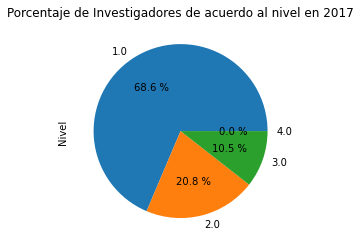

In [150]:
df_2017.Nivel.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al nivel en 2017')
plt.show()

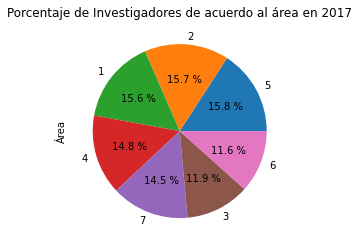

In [151]:
df_2017.Área.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al área en 2017')
plt.show()

In [137]:
path= 'C:/Users/oscar/Downloads/HIGI_HernandezSerrano_ProyectoFinal/Proyecto_Final_Investigadores_activos_SNI/'
df_2018= pd.read_csv (path + '2018.csv')
print(df_2018)

        Nobilis Apellido Paterno Apellido Materno            Nombre  Nivel  \
0          DRA.        HERNANDEZ            LOPEZ  SILVIA HORTENCIA      2   
1           DR.      FINKELSTEIN          SHAPIRO            DANIEL      1   
2           DR.            ALEJO            JAIME           ANTONIO      1   
3          MED.              GIL         CARRASCO             FELIX      1   
4      M. EN C.             RUIZ             CRUZ           MATILDE      1   
...         ...              ...              ...               ...    ...   
28573      DRA.          MORALES           ACOSTA     MAYRA DANIELA      1   
28574  M. EN C.        HERNANDEZ          RAMIREZ       RAUL ULISES      1   
28575      DRA.    GOMEZ PALACIO        SCHJETNAN            ANDREA      1   
28576       DR.        FERNANDEZ           BRETON        DAVID JOSE      1   
28577       DR.            TOVAR           REAÑOS      MIGUEL ANGEL      2   

                                             Institución  Área 

In [138]:
df_2018[['Nivel']]=df_2018[['Nivel']].astype('int64')
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28578 entries, 0 to 28577
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nobilis           28578 non-null  object
 1   Apellido Paterno  28578 non-null  object
 2   Apellido Materno  28578 non-null  object
 3   Nombre            28578 non-null  object
 4   Nivel             28578 non-null  int64 
 5   Institución       28578 non-null  object
 6   Área              28578 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


In [139]:
df_2018.iloc[:, [0,4,5,6]]

Nobilis  Nivel                                        Institución  \
0          DRA.      2          AGROPECUARIA EL AVION, S. DE P.R. DE R.L.   
1           DR.      1                           ARIZONA STATE UNIVERSITY   
2           DR.      1    ASOCIACION MEXICANA DE BIOLOGIA SINTETICA, A.C.   
3          MED.      1  ASOCIACION PARA EVITAR LA CEGUERA EN MEXICO, I...   
4      M. EN C.      1  ASOCIACION PARA EVITAR LA CEGUERA EN MEXICO, I...   
...         ...    ...                                                ...   
28573      DRA.      1                                    YALE UNIVERSITY   
28574  M. EN C.      1                                    YALE UNIVERSITY   
28575      DRA.      1                                    YORK UNIVERSITY   
28576       DR.      1                                    YORK UNIVERSITY   
28577       DR.      2        ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG   

       Área  
0         6  
1         2  
2         5  
3         3  
4         3  
...     ...  
28573     7  
28574     3  
28575     2  
28576     1  
28577     5  

[28578 rows x 4 columns]

In [140]:
pd.crosstab(df_2018.Institución,df_2018.Nobilis)

Nobilis                                             BIOL.  BIOQ.  DR.  DRA.  \
Institución                                                                   
AGROPECUARIA EL AVION, S. DE P.R. DE R.L.               0      0    0     1   
ARIZONA STATE UNIVERSITY                                0      0    1     0   
ASOCIACION MEXICANA DE BIOLOGIA SINTETICA, A.C.         0      0    1     0   
ASOCIACION PARA EVITAR LA CEGUERA EN MEXICO, I....      0      0    2     0   
BANCO DE MEXICO                                         0      0   11     2   
...                                                   ...    ...  ...   ...   
WORCESTER POLYTECHNIC INSTITUTE                         0      0    1     1   
YACHAY TECH                                             0      0    1     0   
YALE UNIVERSITY                                         0      0    2     1   
YORK UNIVERSITY                                         0      0    1     1   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG             0      0    1     0   

Nobilis                                             FIS.  ING.  LIC.  \
Institución                                                            
AGROPECUARIA EL AVION, S. DE P.R. DE R.L.              0     0     0   
ARIZONA STATE UNIVERSITY                               0     0     0   
ASOCIACION MEXICANA DE BIOLOGIA SINTETICA, A.C.        0     0     0   
ASOCIACION PARA EVITAR LA CEGUERA EN MEXICO, I....     0     0     0   
BANCO DE MEXICO                                        0     0     0   
...                                                  ...   ...   ...   
WORCESTER POLYTECHNIC INSTITUTE                        0     0     0   
YACHAY TECH                                            0     0     0   
YALE UNIVERSITY                                        0     0     0   
YORK UNIVERSITY                                        0     0     0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG            0     0     0   

Nobilis                                             M. EN A.  M. EN B.  \
Institución                                                              
AGROPECUARIA EL AVION, S. DE P.R. DE R.L.                  0         0   
ARIZONA STATE UNIVERSITY                                   0         0   
ASOCIACION MEXICANA DE BIOLOGIA SINTETICA, A.C.            0         0   
ASOCIACION PARA EVITAR LA CEGUERA EN MEXICO, I....         0         0   
BANCO DE MEXICO                                            0         0   
...                                                      ...       ...   
WORCESTER POLYTECHNIC INSTITUTE                            0         0   
YACHAY TECH                                                0         0   
YALE UNIVERSITY                                            0         0   
YORK UNIVERSITY                                            0         0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG                0         0   

Nobilis                                             M. EN C.  M. EN I.  \
Institución                                                              
AGROPECUARIA EL AVION, S. DE P.R. DE R.L.                  0         0   
ARIZONA STATE UNIVERSITY                                   0         0   
ASOCIACION MEXICANA DE BIOLOGIA SINTETICA, A.C.            0         0   
ASOCIACION PARA EVITAR LA CEGUERA EN MEXICO, I....         1         0   
BANCO DE MEXICO                                            0         0   
...                                                      ...       ...   
WORCESTER POLYTECHNIC INSTITUTE                            0         0   
YACHAY TECH                                                0         0   
YALE UNIVERSITY                                            1         0   
YORK UNIVERSITY                                            0         0   
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG                0         0   

Nobilis                                             M. en C.  M.en C.  MAT.  \
Institución                   

In [141]:
pd.crosstab(df_2018.Institución,df_2018.Nivel)

Nivel                                               1  2  3
Institución                                                
AGROPECUARIA EL AVION, S. DE P.R. DE R.L.           0  1  0
ARIZONA STATE UNIVERSITY                            1  0  0
ASOCIACION MEXICANA DE BIOLOGIA SINTETICA, A.C.     1  0  0
ASOCIACION PARA EVITAR LA CEGUERA EN MEXICO, I....  5  0  1
BANCO DE MEXICO                                     4  9  0
...                                                .. .. ..
WORCESTER POLYTECHNIC INSTITUTE                     2  0  0
YACHAY TECH                                         1  0  0
YALE UNIVERSITY                                     3  1  0
YORK UNIVERSITY                                     2  0  0
ZENTRUM FUR EURPAISCHE WIRTSCHAFTSFORSCHUNG         0  1  0

[941 rows x 3 columns]

In [142]:
pd.crosstab(df_2018.Área,df_2018.Nobilis)

Nobilis  BIOL.  BIOQ.   DR.  DRA.  FIS.  ING.  LIC.  M. EN A.  M. EN B.  \
Área                                                                      
1            0      0  3395   965     3     0     0         0         0   
2            9      0  2424  1769     0     2     2         0         1   
3           11      1  1262  1396     0     0     3         0         0   
4            0      0  2130  2104     0     1     3         0         0   
5            0      0  2748  1832     0     0     6         0         0   
6            0      0  2194  1265     0     0     0         1         0   
7            0      0  3199   934     0     1     0         0         0   

Nobilis  M. EN C.  M. EN I.  M. en C.  M.en C.  MAT.  MED.  MTRA.  MTRO.  \
Área                                                                       
1              35         1         0        0     1     0      0      0   
2              97         0         1        0     0     5      1      1   
3             372         0         0        1     0   258     27     46   
4               0         0         0        0     0     0      5      7   
5               2         0         0        0     0     0      4     10   
6              11         0         0        0     0     0      0      0   
7               7         3         0        0     0     0      0      1   

Nobilis  Q.F.B.  QUIM.  
Área                    
1             0      1  
2             0      6  
3             2     12  
4             0      0  
5             0      0  
6             0      0  
7             0      0

In [92]:
pd.crosstab(df_2018.Nivel,df_2018.Área)

Área      1     2     3     4     5     6     7
Nivel                                          
1      1911  2326  1905  2282  2297  1785  2618
2      1889  1574  1187  1681  1919  1483  1367
3       601   418   299   287   386   203   160

In [93]:
pd.crosstab(df_2018.Institución,df_2017.Área)

Área                                                  1    2    3    4    5  \
Institución                                                                   
AGROPECUARIA EL AVION, S. DE P.R. DE R.L.             1    0    0    0    0   
ARIZONA STATE UNIVERSITY                              0    0    0    1    0   
ASOCIACION MEXICANA DE BIOLOGIA SINTETICA, A.C.       0    0    0    1    0   
ASOCIACION PARA EVITAR LA CEGUERA EN MEXICO, I....    3    1    0    0    0   
BANCO DE MEXICO                                       6    0    0    0    3   
...                                                 ...  ...  ...  ...  ...   
UNIVERSIDAD MEXIQUENSE DEL BICENTENARIO               0    0    1    0    0   
UNIVERSIDAD MICHOACANA DE SAN NICOLAS DE HIDALGO     41   58   51   48   62   
UNIVERSIDAD MONTRER                                   0    0    0    0    0   
UNIVERSIDAD MOTOLINIA DEL PEDREGAL                    0    0    0    1    0   
UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO             669  647  584  682  739   

Área                                                  6    7  
Institución                                                   
AGROPECUARIA EL AVION, S. DE P.R. DE R.L.             0    0  
ARIZONA STATE UNIVERSITY                              0    0  
ASOCIACION MEXICANA DE BIOLOGIA SINTETICA, A.C.       0    0  
ASOCIACION PARA EVITAR LA CEGUERA EN MEXICO, I....    0    2  
BANCO DE MEXICO                                       0    4  
...                                                 ...  ...  
UNIVERSIDAD MEXIQUENSE DEL BICENTENARIO               1    0  
UNIVERSIDAD MICHOACANA DE SAN NICOLAS DE HIDALGO     43   50  
UNIVERSIDAD MONTRER                                   1    0  
UNIVERSIDAD MOTOLINIA DEL PEDREGAL                    0    0  
UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO             568  583  

[706 rows x 7 columns]

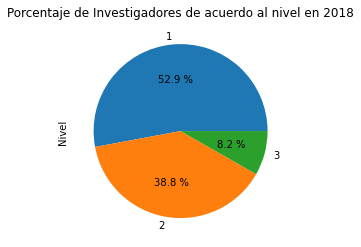

In [94]:
df_2018.Nivel.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al nivel en 2018')
plt.show()

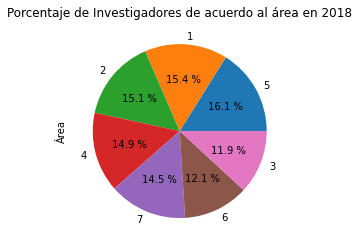

In [95]:
df_2018.Área.value_counts().plot.pie(autopct="%0.1f %%")
plt.title('Porcentaje de Investigadores de acuerdo al área en 2018')
plt.show()

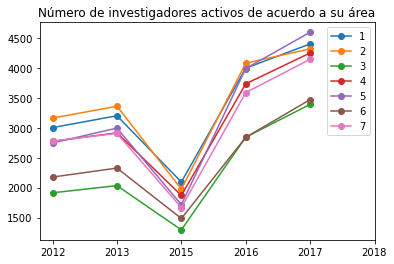

In [222]:
Área_1=[3003,3201,2094,3996,4401]
plt.plot(Área_1,marker='o',label="1")
Área_2=[3162,3360,1975,4080,4318]
plt.plot(Área_2,marker='o', label="2")
Área_3=[1914,2034,1294,2843,3391]
plt.plot(Área_3,marker='o', label="3")
Área_4=[2773,2916,1869,3735,4250]
plt.plot(Área_4,marker='o', label="4")
Área_5=[2747,2995,1715,3990,4596]
plt.plot(Área_5,marker='o', label="5")
Área_6=[2177,2327,1485,2840,3471]
plt.plot(Área_6,marker='o', label="6")
Área_7=[2778,2907,1667,3588,4145]
plt.plot(Área_7,marker='o', label="7")
plt.ion()

plt.legend(loc="best")
plt.title('Número de investigadores activos de acuerdo a su área')
indice = np.arange(6)
plt.xticks(indice, ("2012", "2013", "2015", "2016", "2017", "2018")) 
plt.show()

([<matplotlib.axis.XTick at 0x1effe389370>,
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017'),
  Text(6, 0, '2018')])

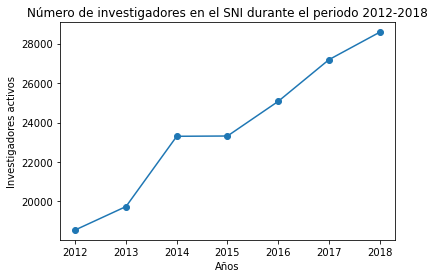

In [216]:
Investigadores=[18554,19740,23302,23316,25073,27187,28578]
plt.plot(Investigadores, marker='o')
plt.title("Número de investigadores en el SNI durante el periodo 2012-2018")
plt.xlabel("Años")
plt.ylabel("Investigadores activos")
indice = np.arange(7)
plt.xticks(indice, ("2012", "2013","2014", "2015", "2016", "2017", "2018")) 

([<matplotlib.axis.XTick at 0x1effe1ce4c0>,
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017'),
  Text(6, 0, '2018')])

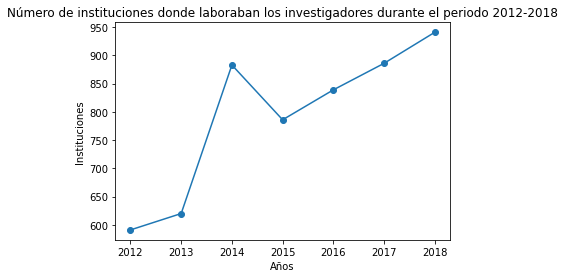

In [215]:
Instituciones=[591,620,883,786,839,886,941]
plt.plot(Instituciones, marker='o')
plt.title("Número de instituciones donde laboraban los investigadores durante el periodo 2012-2018")
plt.xlabel("Años")
plt.ylabel("Instituciones")
indice = np.arange(7)
plt.xticks(indice, ("2012", "2013","2014", "2015", "2016", "2017", "2018"))